In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('http://pogo.software/me4ml/xray.csv')
x = np.array(df['Distance (mm)'][:])
y = np.array(df['Total absorption'][:])

Perform Linear regression (coursework)

In [3]:
#Following course notes conventions
m = 1000
y_sum = np.sum(y)
x_y_sum = np.dot(x,y)
x_sum =np.sum(x)
x_sq = np.square(x)
x_sq_sum = np.sum(x_sq)

b = np.array([[x_y_sum],
        [y_sum]]) 
A = np.array([ [x_sum,x_sq_sum], 
            [m,x_sum]])


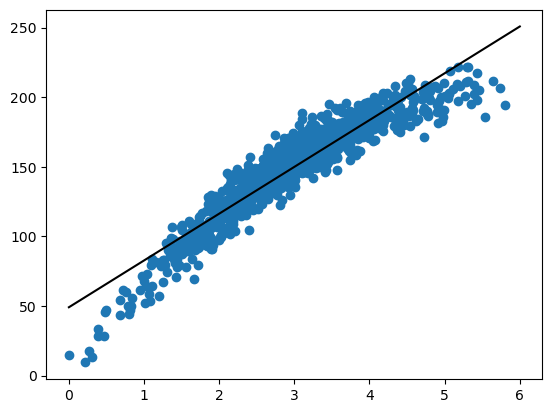

In [4]:
beta = np.linalg.solve(A,b)
x_test = np.linspace(0,6,200)
y_test = beta[0] + x_test * beta[1]
plt.plot(x_test,y_test,color='black')
plt.scatter(x,y)

2. Higher Order Regression: Quadratic

In [5]:
m = 1000
y_1 = np.sum(y)
x_1 = np.sum(x)
x_2 = np.sum(np.square(x))
x_3 = np.sum(np.power(x,3))
x_4 = np.sum(np.power(x,4))

x_y_sum = np.dot(x,y)
x_sq_y_sum = np.dot(x_sq,y)


In [6]:
A = np.array([ [x_2,x_3,x_4],
            [x_1,x_2,x_3], 
            [m,x_1,x_2]])

b = np.array( [[x_sq_y_sum], 
[x_y_sum],
[y_1] ]) 


In [8]:
beta = np.linalg.solve(A,b)
y_test_2 = beta[0] + x_test * beta[1] + np.square(x_test) * beta[2]

Text(0.5, 100, 'Feyzi Eser')

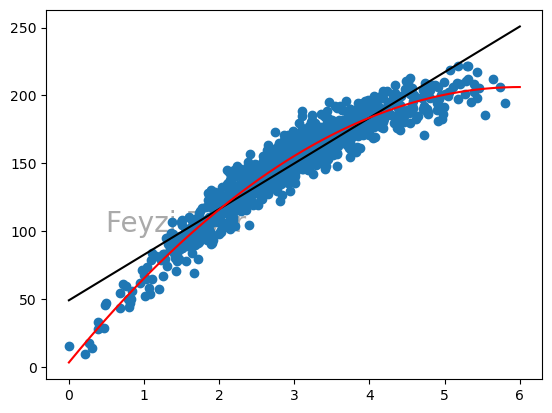

In [9]:
plt.show()
plt.plot(x_test,y_test,color='black')
plt.scatter(x,y)
plt.plot(x_test, y_test_2,color='red')
plt.text(0.5 ,100 , 'Feyzi Eser', size=20, zorder =0, color='#aaaaaa') 

Part B
1. The red line has a lower bias as it fits the given data with less overall error, so the sum of squared errors, say, will be lower for the red line
2- The black line will have lower variance as it will generalize better to new data. It is a simpler model and hence not as attuned to a specific dataset
3. I'd use cross validation. This checks how the models generalize to new datasets and how accurate they are in practice.

Using SciKit Learn

In [10]:
df = pd.read_csv('http://pogo.software/me4ml/hdpeVel.csv')
df = df.set_index('T/C f/MHz')

In [11]:
# extract freq values and scale
freq = df.columns.values.astype(float)*1000000
temp = df.index.values.astype(float)
vel = df.to_numpy()
tot_values = len(freq) * len(temp)

In [13]:
x1grid, x2grid = np.meshgrid(freq,temp)
Xgrid = np.concatenate( (x1grid.reshape(tot_values,1), x2grid.reshape(tot_values,1))
, axis=1)
ygrid = vel.reshape(tot_values,1)


In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(Xgrid,ygrid)
y_lin = reg.predict(Xgrid)

Make plot

In [15]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=Xgrid[:,0], y=Xgrid[:,1], z=ygrid[:,0],
mode='markers',
marker=dict(size=2,color='#000000', symbol='x')))

fig.add_trace(go.Scatter3d(x=Xgrid[:,0], y=Xgrid[:,1], z=y_lin[:,0], 
mode='markers',
marker=dict(size=3,color='#ff0000', symbol='circle')))



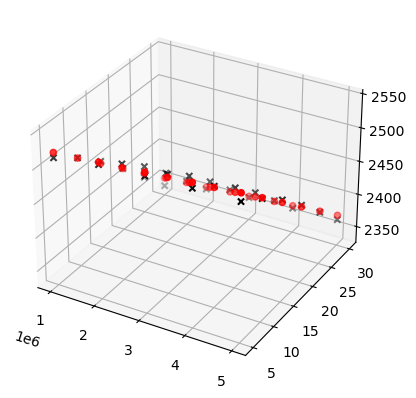

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(Xgrid[:,0], Xgrid[:,1], ygrid, marker='x', color='#000000')
ax.scatter(Xgrid[:,0], Xgrid[:,1], y_lin, marker='o', color='#ff0000')

### Fit polynomials

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
#new feature vector
X_poly = poly.fit_transform(Xgrid)

print(poly.powers_)

[[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [19]:
reg_poly = LinearRegression()
reg_poly.fit(X_poly, ygrid)

y_poly = reg_poly.predict(X_poly,ygrid)

TypeError: predict() takes 2 positional arguments but 3 were given

#### Plot

In [ ]:
fig.add_trace(go.Scatter3d(x=Xgrid[:,0], y=Xgrid[:,1], z=y_lin[:,0], 
mode='markers',
marker=dict(size=3,color='#00ff00', symbol='diamond')))